## Take-home Challenge 1

Project consists of three independent parts as listed below:
- Part 1 ‑ Exploratory data analysis
- Part 2 ‑ Experiment and metrics design
- Part 3 ‑ Predictive modeling

### Load necessary libraries and packages

In [1]:
# import relevant libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.6)

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1 ‑ Exploratory data analysis

The attached 'logins.json' file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

- **Read 'logins.json' file**

In [3]:
df_log = pd.read_json('logins.json', orient='values')

df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df_log.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


- **Convert 'login_time' to datetime**

In [5]:
df_log['login_time'] = pd.to_datetime(df_log['login_time'])

In [6]:
# sort in ascending order

df_log.sort_values('login_time', inplace = True)

df_log.reset_index(drop = True, inplace = True)
df_log.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


- **Create a new column to count the elapsed time from a certain reference point**

In [7]:
# create a reference point
import datetime

start_values = ['1970', '01', '01', '0', '0', '0']

start_time = datetime.datetime(*map(int, start_values))
print(start_time)

1970-01-01 00:00:00


In [8]:
# create 'delta_t' column counting time from start_time 
df_log['delta_t'] = df_log['login_time'] - start_time

df_log.head()

,login_time,delta_t
0,1970-01-01 20:12:16,0 days 20:12:16
1,1970-01-01 20:13:18,0 days 20:13:18
2,1970-01-01 20:16:10,0 days 20:16:10
3,1970-01-01 20:16:36,0 days 20:16:36
4,1970-01-01 20:16:37,0 days 20:16:37


- **From 'delta_t' create new column with time period of 15 minutes**

In [9]:
# create new column with time period of 15 minutes and initialize with 0
df_log['delta_t_15min'] = 0

df_log.head()

,login_time,delta_t,delta_t_15min
0,1970-01-01 20:12:16,0 days 20:12:16,0
1,1970-01-01 20:13:18,0 days 20:13:18,0
2,1970-01-01 20:16:10,0 days 20:16:10,0
3,1970-01-01 20:16:36,0 days 20:16:36,0
4,1970-01-01 20:16:37,0 days 20:16:37,0


In [10]:
# assign the correct 'delta_t_15min' values

for i in range(len(df_log)):
    df_log['delta_t_15min'].iloc[i] = df_log['delta_t'].iloc[i].total_seconds() // (15*60)

In [11]:
df_log.head(10)

,login_time,delta_t,delta_t_15min
0,1970-01-01 20:12:16,0 days 20:12:16,80
1,1970-01-01 20:13:18,0 days 20:13:18,80
2,1970-01-01 20:16:10,0 days 20:16:10,81
3,1970-01-01 20:16:36,0 days 20:16:36,81
4,1970-01-01 20:16:37,0 days 20:16:37,81
5,1970-01-01 20:21:41,0 days 20:21:41,81
6,1970-01-01 20:26:05,0 days 20:26:05,81
7,1970-01-01 20:26:21,0 days 20:26:21,81
8,1970-01-01 20:31:03,0 days 20:31:03,82
9,1970-01-01 20:34:46,0 days 20:34:46,82


- **Obtain the Login count**

In [12]:
# get the login count and sort in ascending order
login_count = df_log['delta_t_15min'].value_counts().sort_index()

print(login_count)

80      2
81      6
82      9
83      7
84      1
       ..
9863    5
9864    5
9865    2
9866    7
9867    6
Name: delta_t_15min, Length: 9381, dtype: int64


Examine for missing time data points.

In [13]:
# len(login_count) should be equal to login_count.index.max() - login_count.index.min()

print('Expected number of points in time: ', login_count.index.max() - login_count.index.min())
print('Actual number of points in time: ', len(login_count))

Expected number of points in time:  9787
Actual number of points in time:  9381


There are 406 missing points in time.

- **Plot the Login count in time in hours to examine for patterns**

    - First 72 hours

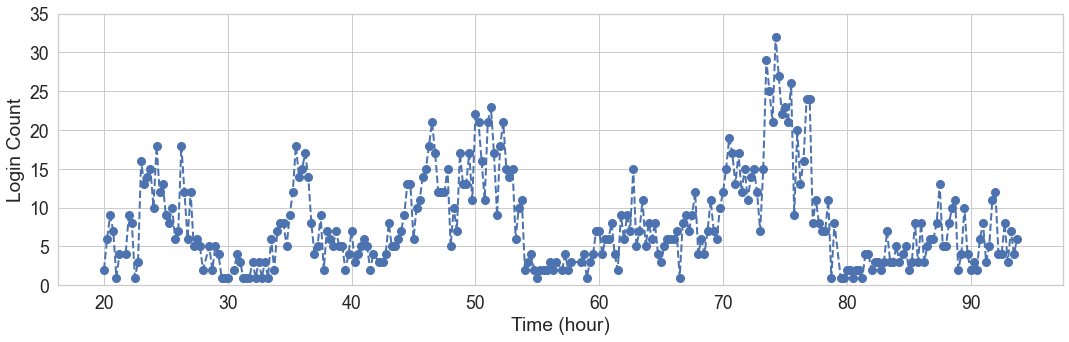

In [14]:
n_pts = 72 * 4 

plt.figure(figsize = (18, 5))
plt.plot(login_count.index[0:n_pts] * 0.25, login_count.values[0:n_pts], 'bo--', linewidth = 2, markersize = 8)
plt.ylim(0, 35)
plt.xlabel('Time (hour)')
plt.ylabel('Login Count')
plt.show()

    - Second 72 hours

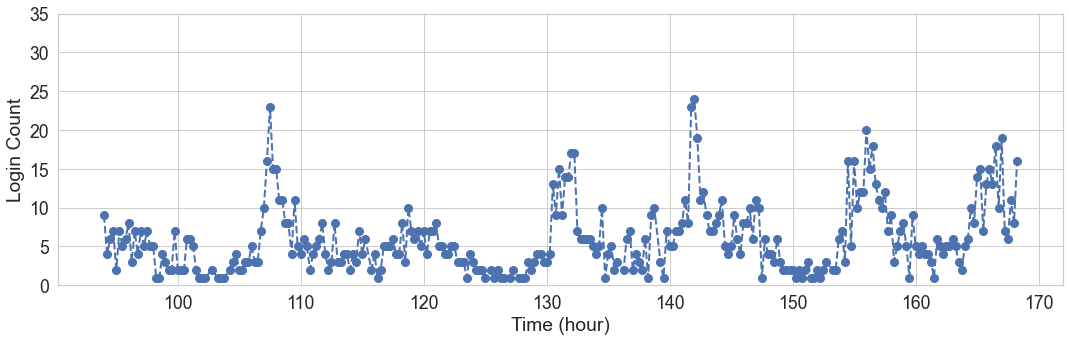

In [15]:
plt.figure(figsize = (18, 5))
plt.plot(login_count.index[n_pts:2*n_pts] * 0.25, login_count.values[n_pts:2*n_pts], 'bo--', linewidth = 2, markersize = 8)
plt.ylim(0, 35)
plt.xlabel('Time (hour)')
plt.ylabel('Login Count')
plt.show()

### Observations:
- The Login data is cyclical in nature with a period of 12 hours. However, there are variations in both the period and the magnitude of the cycles.
- Missing data points: Out of total 9787 expected point in time, there are 406 missing points. 

## ****

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<span style='color:Blue'> As a key measure of success, I would use the average number of trips per day between the two cities. The metric should be separate for weekdays and weekends. Any statistically significant difference in this metric obtained when there are no incentives and when there are incentives in place would indicate incentives success. </span>

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment

<span style='color:Blue'> Record number of trips between the cities over four weeks in two cases: A) No incenitves for drivers at the toll bridge; B) Apply incentives (pay toll fee) for drivers. </span>

    b. what statistical test(s) you will conduct to verify the significance of the observation

<span style='color:Blue'> We will obtain the average number of trips between the cities per day for each week; treat weekdays and weekends separately. </span>

    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        
<span style='color:Blue'> If the averages for case (A) and case (B) are more than two sigma apart, then the incentives have an effect (need to determine the direction, as well). Depending on the results, recommendations could be made to: 1) apply incentives: a) only on weekdays; b) only on weekends; c) both on weekdays and on weekends; 2) do not apply incentives. </span>
        
<span style='color:Blue'> Special attention should be paid to the results from different weeks. One possibility is that the incentives might work for one or two weeks and then stop working because the risks of  trips between the cities outweigh the incentives. </span>

## ****

## Part 3 ‑ Predictive modeling

Process, explore and model data in 'ultimate_data_challenge.json' to predict which users will become 'active' users (retaining problem).

For problem formulation and details see 'ultimate_data_science_challenge.pdf'

### 3.1 Data Processing

- **Load data**

In [16]:
# read 'ultimate_data_challenge.json'

df = pd.read_json('ultimate_data_challenge.json', orient = 'values')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


- **Create new feature indicating the month of the last trip**

In [19]:
# create 'last_trip_month' column
df['last_trip_month'] = pd.DatetimeIndex(df['last_trip_date']).month

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,6
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,5
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,6
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,3


In [20]:
# get the last date on record
print(pd.DatetimeIndex(df['last_trip_date']).max())

2014-07-01 00:00:00


**Based on the last date on record, users who have 'last_trip_month' values of 6 and 7 will be denoted as active users.**

Create new column 'active_rider' and fill its values accordingly.

In [21]:
# create column 'active_rider' and initialize with 0

df['active_rider'] = 0
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,active_rider
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,6,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,5,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,6,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,3,0


In [22]:
# replace 'active_rider' values with 1 if 'last_trip_month' value is 6 or 7

feat_fill = 'active_rider'
feat_lookup = 'last_trip_month'

n_condition = df[feat_lookup].max()

for i in range(len(df)):
    if df[feat_lookup].iloc[i] >= n_condition - 1:
        df[feat_fill].iloc[i] = 1

In [23]:
# check

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_month,active_rider
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,6,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,5,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,6,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,3,0


### 3.2 Data Exploration

- **Select relevant features**

In [24]:
# select the relevant features

df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'last_trip_month', 'active_rider'],
      dtype='object')

In [25]:
feat_select = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'phone', 'surge_pct', 
               'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'active_rider']

df_s = df[feat_select].copy()
df_s.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_rider
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [26]:
# shorten long column names

df_s = df_s.rename(columns = {'trips_in_first_30_days':'month1_trips', 'avg_rating_of_driver':'driver_rating', 
                              'avg_rating_by_driver':'rider_rating', 'ultimate_black_user':'lux_user'})

df_s.head()

,city,month1_trips,driver_rating,avg_surge,phone,surge_pct,lux_user,weekday_pct,avg_dist,rider_rating,active_rider
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


- **Checking for and filling missing (null) values**

In [27]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           50000 non-null  object 
 1   month1_trips   50000 non-null  int64  
 2   driver_rating  41878 non-null  float64
 3   avg_surge      50000 non-null  float64
 4   phone          49604 non-null  object 
 5   surge_pct      50000 non-null  float64
 6   lux_user       50000 non-null  bool   
 7   weekday_pct    50000 non-null  float64
 8   avg_dist       50000 non-null  float64
 9   rider_rating   49799 non-null  float64
 10  active_rider   50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


The following columns have missing values: 'driver_rating', 'phone', and 'rider_rating'.

We will fill the missing values in 'driver_rating' and 'rider_rating' by using the respective mean values. The missing values in 'phone' will be replaced by the most common value.

In [28]:
# fill 'driver_rating' and 'rider_rating' nulls with mean value
feat_list = ['driver_rating','rider_rating']

for feat in feat_list:
    feat_mean = round(df_s[feat].mean(), 1)
    df_s[feat].fillna(feat_mean, inplace = True)

In [29]:
# fill 'phone' nulls with most common value

feat_fill = 'phone'

count_feat_fill = df_s[feat_fill].value_counts(normalize = True) * 100
print(count_feat_fill)

iPhone     69.716152
Android    30.283848
Name: phone, dtype: float64


In [30]:
df_s[feat_fill].fillna(count_feat_fill.index[0], inplace = True)

In [31]:
# check

df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           50000 non-null  object 
 1   month1_trips   50000 non-null  int64  
 2   driver_rating  50000 non-null  float64
 3   avg_surge      50000 non-null  float64
 4   phone          50000 non-null  object 
 5   surge_pct      50000 non-null  float64
 6   lux_user       50000 non-null  bool   
 7   weekday_pct    50000 non-null  float64
 8   avg_dist       50000 non-null  float64
 9   rider_rating   50000 non-null  float64
 10  active_rider   50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


All missing values have been filled.

- **Feature composition for 'active' (1) and 'non-active' (0) riders**

    - Composition of 'city'

In [32]:
target = 'active_rider'

feat = 'city'

print(feat.upper() + ' value count for active riders:')
print(round(df_s[df_s[target] == 1][feat].value_counts(normalize = True) * 100, 1))
print('\n')
print(feat.upper() + ' value count for non-active riders:')
print(round(df_s[df_s[target] == 0][feat].value_counts(normalize = True) * 100, 1))

CITY value count for active riders:
Winterfell        43.7
King's Landing    33.8
Astapor           22.5
Name: city, dtype: float64


CITY value count for non-active riders:
Winterfell        48.5
Astapor           39.4
King's Landing    12.1
Name: city, dtype: float64


In [33]:
# visiualize using bar plots

# define function to plot feature value count
x_max = 50

def value_count_plot(data, target, feat, x_max):
    
    count_1 = data[data[target] == 1][feat].value_counts(normalize = True) * 100
    count_2 = data[data[target] == 0][feat].value_counts(normalize = True) * 100
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8), sharey = False)
    
    sns.barplot(count_1.values, count_1.index, palette = 'viridis', ax = ax1)
    ax1.set_xlim(0, x_max)
    ax1.set(xlabel = 'Percentage of Total Number of Records')
    ax1.set(title = 'Number of Records vs. ' + feat.upper() + ': Active Riders')
    
    sns.barplot(count_2.values, count_2.index, palette = 'viridis', ax = ax2)
    ax2.set_xlim(0, x_max)
    ax2.set(xlabel = 'Percentage of Total Number of Records')
    ax2.set(title = 'Number of Records vs. ' + feat.upper() + ': Non-active Riders')
    
    plt.show()

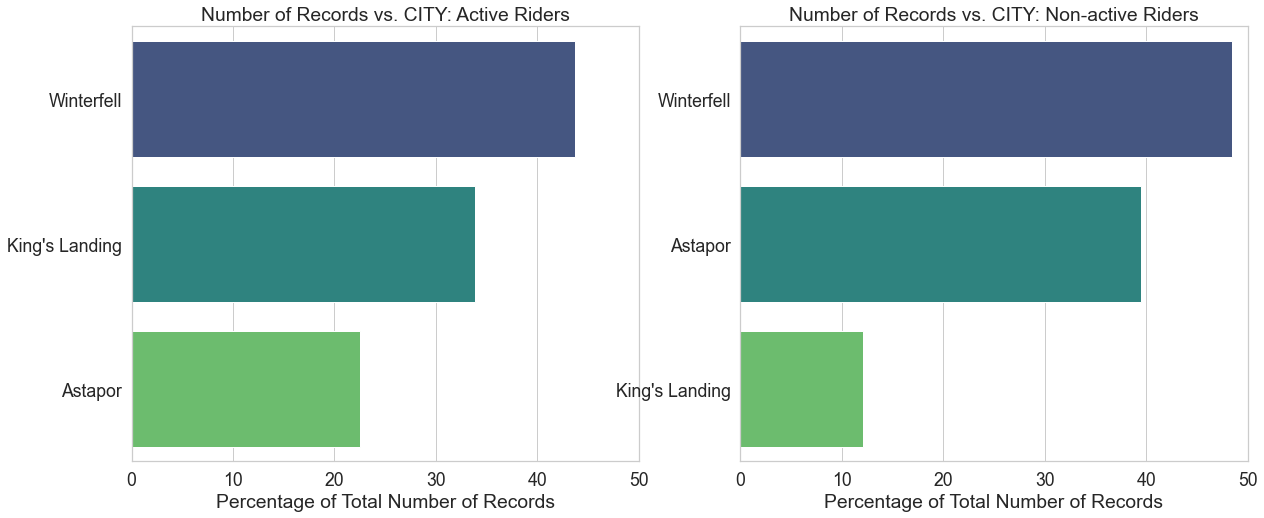

In [34]:
value_count_plot(df_s, target, feat, x_max)

    - Composition of 'phone'

In [35]:
target = 'active_rider'

feat = 'phone'

print(feat.upper() + ' value count for active riders:')
print(round(df_s[df_s[target] == 1][feat].value_counts(normalize = True) * 100, 1))
print('\n')
print(feat.upper() + ' value count for non-active riders:')
print(round(df_s[df_s[target] == 0][feat].value_counts(normalize = True) * 100, 1))

PHONE value count for active riders:
iPhone     83.3
Android    16.7
Name: phone, dtype: float64


PHONE value count for non-active riders:
iPhone     61.9
Android    38.1
Name: phone, dtype: float64


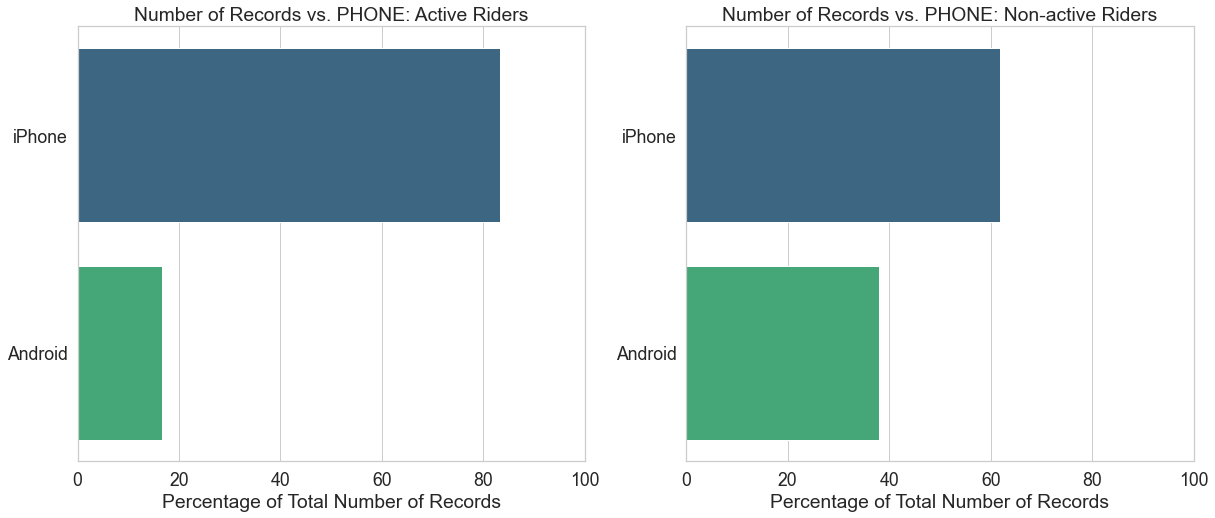

In [36]:
x_max = 100
value_count_plot(df_s, target, feat, x_max)

    - Composition of 'lux_user'

In [37]:
feat = 'lux_user'

print(feat.upper() + 'value count for active riders:')
print(round(df_s[df_s[target] == 1][feat].value_counts(normalize = True) * 100, 1))
print('\n')
print(feat.upper() + 'value count for non-active riders:')
print(round(df_s[df_s[target] == 0][feat].value_counts(normalize = True) * 100, 1))

LUX_USERvalue count for active riders:
True     50.5
False    49.5
Name: lux_user, dtype: float64


LUX_USERvalue count for non-active riders:
False    70.0
True     30.0
Name: lux_user, dtype: float64


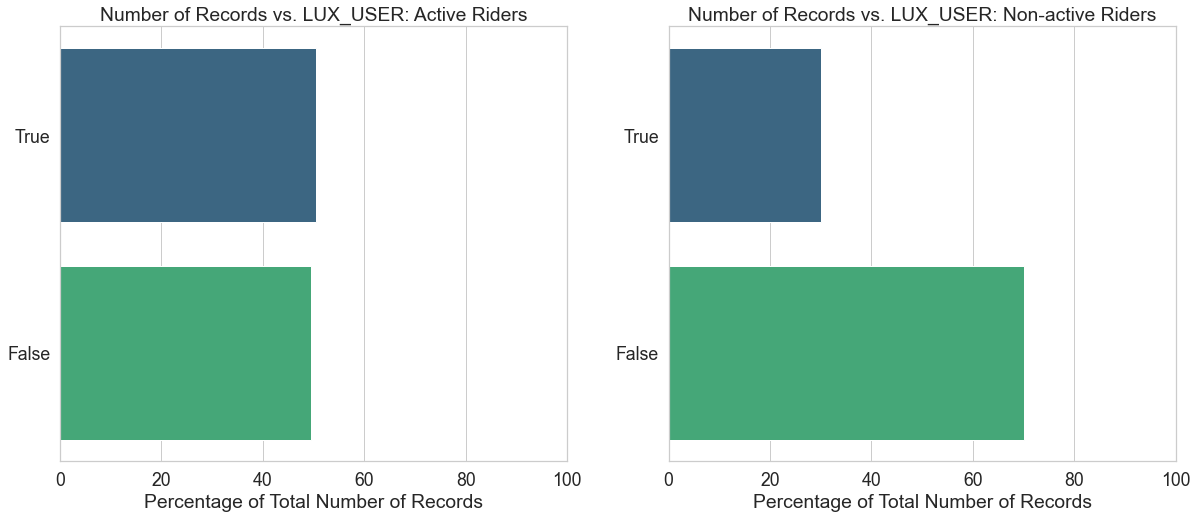

In [38]:
x_max = 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8), sharey = False)

sns.barplot([50.5, 49.5], ['True', 'False'], palette = 'viridis', ax = ax1)
ax1.set_xlim(0, x_max)
ax1.set(xlabel = 'Percentage of Total Number of Records')
ax1.set(title = 'Number of Records vs. ' + feat.upper() + ': Active Riders')
    
sns.barplot([30.0, 70.0], ['True', 'False'], palette = 'viridis', ax = ax2)
ax2.set_xlim(0, x_max)
ax2.set(xlabel = 'Percentage of Total Number of Records')
ax2.set(title = 'Number of Records vs. ' + feat.upper() + ': Non-active Riders')
    
plt.show()

- **Histograms of 'avg_dist' and 'month1_trips' for 'active' (1) and 'non-active' (0) riders**

    - Histogram of 'avg_dist'

In [39]:
# define function to plot feature histograms

feat = 'avg_dist'

def plot_feat_hist(data, target, feat, n_bin, x_max):
    y1 = data[data[target] == 1][feat]
    y2 = data[data[target] == 0][feat]
    
    plt.figure(figsize = (12, 8))
    sns.histplot(y1, bins = n_bin, color = 'blue', alpha = 0.5, label = 'Active Rider')
    sns.histplot(y2, bins = n_bin, color = 'red', alpha = 0.5, label = 'Non-active Rider')
    plt.xlim(0, x_max)
    plt.legend()
    plt.xlabel(feat.upper())
    plt.title(feat.upper() + ' Histogram', pad = 20)
    plt.show()

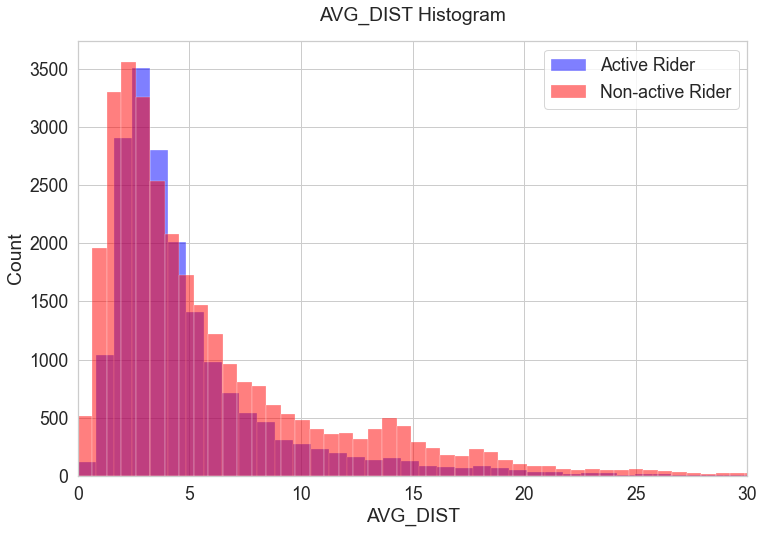

In [40]:
feat = 'avg_dist'

n_bin = 200
x_max = 30

plot_feat_hist(df_s, target, feat, n_bin, x_max)

    - Histogram of 'month1_trips'

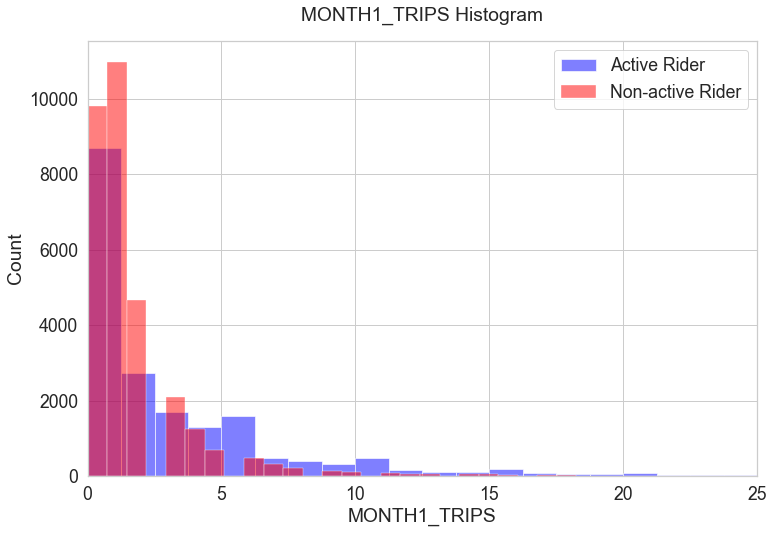

In [41]:
feat = 'month1_trips'

n_bin = 100
x_max = 25

plot_feat_hist(df_s, target, feat, n_bin, x_max)

- **Boxplot of 'rider_rating' and 'driver_rating' for 'active' (1) and 'non-active' (0) riders**

    - Boxplot of 'rider_rating'

In [42]:
# define function to plot feature histograms

feat = 'rider_rating'

def feat_boxplot(data, target, feat):

    plt.figure(figsize = (8, 6))
    sns.boxplot(x = data[target], y = data[feat], palette = 'viridis')
    plt.xlabel(target.upper())
    plt.ylabel(feat.upper())
    plt.title(feat.upper() + ' vs. ' + target.upper() + ' Boxplot', pad = 20)
    plt.show()

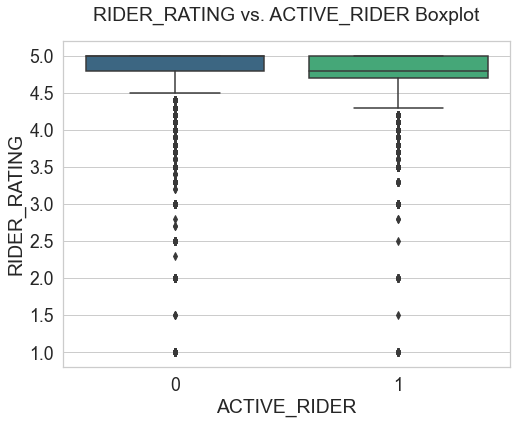

In [43]:
feat = 'rider_rating'
feat_boxplot(df_s, target, feat)

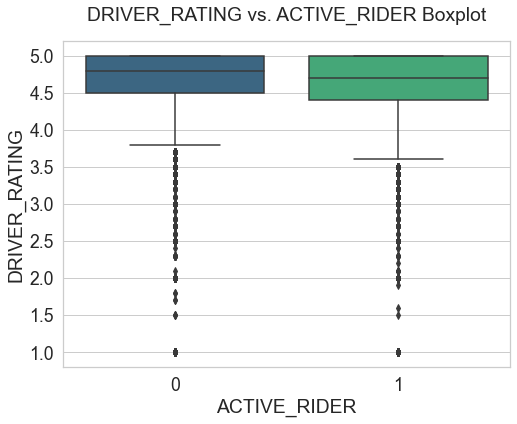

In [44]:
feat = 'driver_rating'
feat_boxplot(df_s, target, feat)

### 3.3 Data Modeling

This is a classification problem and we will use Random Forest Classifier (RFC) for modeling.

- **Replacing non-numerical categorical values  with ordinal categorical values**

In [45]:
df_s.head()

,city,month1_trips,driver_rating,avg_surge,phone,surge_pct,lux_user,weekday_pct,avg_dist,rider_rating,active_rider
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


    - Replacing 'city' values

In [46]:
# get value count as percentages
feat = 'city'

count_feat = df_s[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

Winterfell        46.67
Astapor           33.07
King's Landing    20.26
Name: city, dtype: float64


In [47]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for later use if necessary!
dict_city = dict_feat

{'Winterfell': 0, 'Astapor': 1, "King's Landing": 2}


In [48]:
# replace the current categorical values with numerical categorical values
df_s[feat].replace(dict_feat, inplace=True)

# check
print(df_s[feat].value_counts().index)

Int64Index([0, 1, 2], dtype='int64')


    - Replacing 'phone' values

In [49]:
# get value count as percentages
feat = 'phone'

count_feat = df_s[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

iPhone     69.96
Android    30.04
Name: phone, dtype: float64


In [50]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for later use if necessary!
dict_phone = dict_feat

{'iPhone': 0, 'Android': 1}


In [51]:
# replace the current categorical values with numerical categorical values
df_s[feat].replace(dict_feat, inplace=True)

# check
print(df_s[feat].value_counts().index)

Int64Index([0, 1], dtype='int64')


    - Replacing 'lux_user' values

In [52]:
# get value count as percentages
feat = 'lux_user'

count_feat = df_s[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

False    62.29
True     37.71
Name: lux_user, dtype: float64


In [53]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for later use if necessary!
dict_lux = dict_feat

{False: 0, True: 1}


In [54]:
# replace the current categorical values with numerical categorical values
df_s[feat].replace(dict_feat, inplace=True)

# check
print(df_s[feat].value_counts().index)

Int64Index([0, 1], dtype='int64')


In [55]:
# check

df_s.head()

,city,month1_trips,driver_rating,avg_surge,phone,surge_pct,lux_user,weekday_pct,avg_dist,rider_rating,active_rider
0,2,4,4.7,1.10,0,15.4,1,46.2,3.67,5.0,1
1,1,0,5.0,1.00,1,0.0,0,50.0,8.26,5.0,0
2,1,3,4.3,1.00,0,0.0,0,100.0,0.77,5.0,0
3,2,9,4.6,1.14,0,20.0,1,80.0,2.36,4.9,1
4,0,14,4.4,1.19,1,11.8,0,82.4,3.13,4.9,0


All non-numerical categorical values have been relpaced and we can proceed with modeling.

- **Create train and test data sets**

In [56]:
# create subsets of independent and dependent (target) variables

# independent variables
X = df_s.iloc[:, 0:10].values # includes all features, but target

# target
y = df_s.iloc[:, -1].values # target = 'active_rider'

In [57]:
# split into train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

- **RFC without Optimization**

In [58]:
# create RFC model

from sklearn.ensemble import RandomForestClassifier

# start with reasonable model parameters; oob_score, n_jobs are stabilizing and speeding up parameters
model_0 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 1, oob_score = True, n_jobs = -1, random_state = 42)

In [59]:
# train and predict
model_0 = model_0.fit(X_train, y_train)

y_pred_0 = model_0.predict(X_test)

In [60]:
# evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_0))

Confusion Matrix:
[[6291 1509]
 [1590 3110]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      7800
           1       0.67      0.66      0.67      4700

    accuracy                           0.75     12500
   macro avg       0.74      0.73      0.73     12500
weighted avg       0.75      0.75      0.75     12500



- **RFC with Bayesian Optimization**

In [61]:
# import hyperopt optimization packages

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

    - Optimization 1 - metrics.precision_score

In [62]:
# Optimization 1 - metrics.precision_score

# create hyperparameter space to search over
space_rfc = {'max_depth': hp.choice('max_depth', np.arange(2, 20, 1, dtype = int)), 
             'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)), 
             'max_features': hp.choice('max_features', np.arange(0.1, 1.1, 0.1, dtype = float)), 
             'min_samples_split': hp.choice('min_samples_split', np.arange(2, 16, 1, dtype = int)), 
             'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1, 10, 1, dtype = int))}

# define number for max_evals
n_evals = 500

# define optimization functions
def score_precision_rfc(params):
    model = RandomForestClassifier(**params, oob_score = True, n_jobs = -1)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # metrics.precision_score
    score = -metrics.precision_score(y_test, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_precision_rfc(trials, space_rfc):
    
    best = fmin(score_precision_rfc, space_rfc, algo = tpe.suggest, max_evals = n_evals)
    return best

In [63]:
# run optimization
n_evals = 200

trials = Trials()
best_params_rfc = optimize_precision_rfc(trials, space_rfc)

-0.7836                                                                                                                
-0.776                                                                                                                 
-0.7792                                                                                                                
-0.78544                                                                                                               
-0.7816                                                                                                                
-0.78256                                                                                                               
-0.7808                                                                                                                
-0.78232                                                                                                               
-0.77832                                

-0.78432                                                                                                               
-0.78424                                                                                                               
-0.75632                                                                                                               
-0.782                                                                                                                 
-0.74808                                                                                                               
-0.78264                                                                                                               
-0.78368                                                                                                               
-0.77176                                                                                                               
-0.78312                                

-0.78048                                                                                                               
-0.75464                                                                                                               
-0.78352                                                                                                               
-0.77224                                                                                                               
-0.78464                                                                                                               
-0.78312                                                                                                               
-0.78112                                                                                                               
-0.78288                                                                                                               
-0.78424                                

In [64]:
# get best parameters
space_eval(space_rfc, best_params_rfc)

{'max_depth': 14,
 'max_features': 0.2,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 80}

In [65]:
# create optimized model

rfc_model_opt1 = RandomForestClassifier(max_depth = 14, 
                                        max_features = 0.2, 
                                        min_samples_leaf = 5, 
                                        min_samples_split = 2, 
                                        n_estimators = 80,
                                        n_jobs = -1, 
                                        random_state = 0)

In [66]:
# fit and predict

rfc_model_opt1 = rfc_model_opt1.fit(X_train, y_train)

y_pred_rfc_1 = rfc_model_opt1.predict(X_test)

In [67]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_rfc_1))

Confusion Matrix:
[[6751 1049]
 [1615 3085]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7800
           1       0.75      0.66      0.70      4700

    accuracy                           0.79     12500
   macro avg       0.78      0.76      0.77     12500
weighted avg       0.78      0.79      0.78     12500



In [68]:
# comparison - model w/o optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_0))

Confusion Matrix:
[[6291 1509]
 [1590 3110]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      7800
           1       0.67      0.66      0.67      4700

    accuracy                           0.75     12500
   macro avg       0.74      0.73      0.73     12500
weighted avg       0.75      0.75      0.75     12500



Results from Optimization 1 model show definite improvement.

    - Optimization 2 - metrics.f1_score

In [69]:
# Optimization 2 - metrics.f1_score

# make appropriate changes in optimization function
def score_f1_rfc(params):
    model = RandomForestClassifier(**params, oob_score = True, n_jobs = -1)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # metrics.f1_score
    score = -metrics.f1_score(y_test, y_pred, pos_label = 1, average = 'micro', 
                              sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_f1_rfc(trials, space_rfc):
    
    best = fmin(score_f1_rfc, space_rfc, algo = tpe.suggest, max_evals = n_evals)
    return best

In [70]:
# run optimization

n_evals = 200

trials = Trials()
best_params_rfc = optimize_f1_rfc(trials, space_rfc)

-0.78352                                                                                                               
-0.72368                                                                                                               
-0.75256                                                                                                               
-0.78096                                                                                                               
-0.7808                                                                                                                
-0.7704                                                                                                                
-0.77712                                                                                                               
-0.78144                                                                                                               
-0.77464                                

-0.78416                                                                                                               
-0.7692800000000001                                                                                                    
-0.78616                                                                                                               
-0.7816                                                                                                                
-0.7838399999999999                                                                                                    
-0.7833599999999998                                                                                                    
-0.78424                                                                                                               
-0.78328                                                                                                               
-0.77952                                

-0.77744                                                                                                               
-0.77768                                                                                                               
-0.78296                                                                                                               
-0.7816                                                                                                                
-0.7496                                                                                                                
-0.7828                                                                                                                
-0.78392                                                                                                               
-0.78                                                                                                                  
-0.78328                                

In [71]:
# get best parameters
space_eval(space_rfc, best_params_rfc)

{'max_depth': 19,
 'max_features': 0.30000000000000004,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'n_estimators': 260}

In [72]:
# create optimized model

rfc_model_opt2 = RandomForestClassifier(max_depth = 19, 
                                        max_features = 0.3, 
                                        min_samples_leaf = 9, 
                                        min_samples_split = 8, 
                                        n_estimators = 260,
                                        n_jobs = -1, 
                                        random_state = 0)

In [73]:
# fit and predict

rfc_model_opt2 = rfc_model_opt2.fit(X_train, y_train)

y_pred_rfc_2 = rfc_model_opt2.predict(X_test)

In [74]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_rfc_2))

Confusion Matrix:
[[6732 1068]
 [1619 3081]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7800
           1       0.74      0.66      0.70      4700

    accuracy                           0.79     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.78      0.79      0.78     12500



In [75]:
# comparison - opt_1 results
print('Optimization model 1 results:')
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_rfc_1))

Optimization model 1 results:


Confusion Matrix:
[[6751 1049]
 [1615 3085]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7800
           1       0.75      0.66      0.70      4700

    accuracy                           0.79     12500
   macro avg       0.78      0.76      0.77     12500
weighted avg       0.78      0.79      0.78     12500



Both optimization models have almost identical performance. Because Optimization 1 model shows slightly better performance we will use it to determine the data feature importances.

In [76]:
# obtain feature importances using rfc_model_opt1 with entire dataset X,y

rfc_model_opt1 = rfc_model_opt1.fit(X, y)

In [77]:
# get the names of the features in X
df_s.columns

Index(['city', 'month1_trips', 'driver_rating', 'avg_surge', 'phone',
       'surge_pct', 'lux_user', 'weekday_pct', 'avg_dist', 'rider_rating',
       'active_rider'],
      dtype='object')

In [78]:
feat_list = ['city', 'month1_trips', 'driver_rating', 'avg_surge', 'phone', 
             'surge_pct', 'lux_user', 'weekday_pct', 'avg_dist', 'rider_rating']

feature_imp = pd.Series(rfc_model_opt1.feature_importances_, index = feat_list).sort_values(ascending=False)
feature_imp

rider_rating     0.155789
weekday_pct      0.145932
city             0.138522
surge_pct        0.114755
avg_dist         0.101886
avg_surge        0.089813
month1_trips     0.080048
phone            0.069481
lux_user         0.060068
driver_rating    0.043707
dtype: float64

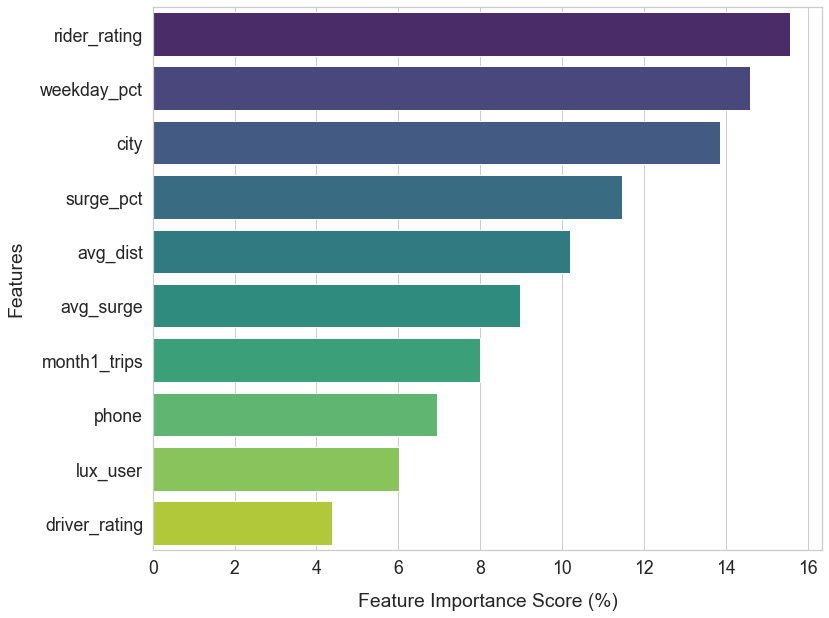

In [79]:
# visualize feature importances

plt.figure(figsize=(12, 10))
sns.barplot(x = feature_imp * 100, y = feature_imp.index, palette = 'viridis')

plt.xlabel('Feature Importance Score (%)', labelpad = 15)
plt.ylabel('Features', labelpad = 15)

plt.show()

**The top three most important features determining the outcome for active rider are:**
- rider_rating
- weekday_pct
- city

### 3.4 Summary

The data in 'ultimate_data_challenge.json' have been processed, explored and modeled in order to predict which users will become 'active' users.

Random forest classifier model has been optimized and found to predict with good accuracy the outcome for active user. 